<a href="https://colab.research.google.com/github/wesleybeckner/data_science_foundations/blob/main/notebooks/S7_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Foundations <br> Session 7: Boosting

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

In this session, we're continuing on the topic of supervised learning an ensemble learning method called boosting.

<br>

---

<br>

<a name='top'></a>

<a name='x.0'></a>

## 7.1 Preparing Environment and Importing Data

[back to top](#top)

<a name='x.0.1'></a>

### 7.1.1 Import Packages

[back to top](#top)

In [4]:
from sklearn import svm
from sklearn.datasets import make_blobs, make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from ipywidgets import interact, FloatSlider, interactive

In [6]:
def plot_boundaries(X, clf, ax=False):
  plot_step = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  if ax:
    cs = ax.contourf(xx, yy, Z, cmap='viridis', alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='grey', alpha=0.9)
    return ax
  else:
    cs = plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='grey', alpha=0.9)
  

<a name='x.0.2'></a>

### 7.1.2 Load Dataset

[back to top](#top)

For this session, we will use dummy datasets from sklearn.

<a name='x.2'></a>

## 7.2 Boosting

[back to top](#top)

The last supervised learning algorithms we will cover, are the boosting learners. Similar to Bagging, Boosting algorithms leverage the idea of training on variations of the available data, only this time they do so in serial rather than parallel.

What do I mean by this?

It's a little nuanced, but the idea is straight forward. The first model trains on the dataset, it generates some error. The datapoints creating the greatest amount of error are emphasized in the second round of training, and so on, as the sequence of models proceeds, ever troublesome datapoints receive ever increasing influence. 



<a name='x.2.1'></a>

### 7.2.1 AdaBoost

[Back to Top](#top)

AdaBoost was the first boosting learner of its kind. It's _weak learners_ (the things that are stitched together in serial) are typically _stumps_ or really shallow decision trees. Lets create some data and fit an `AdaBoostClassifier` to it:

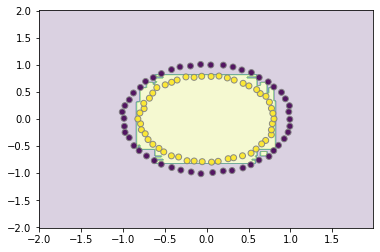

In [7]:
X, y = make_circles(random_state=42, noise=.01)
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3))
clf.fit(X,y)
plot_boundaries(X, clf)

Trying with a different distribution of data:

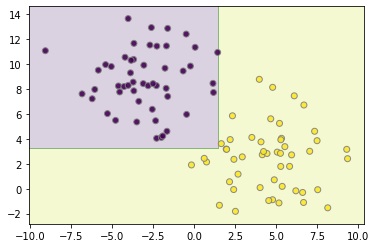

In [9]:
X, y = make_blobs(random_state=42, centers=2, cluster_std=2.5)
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5))
clf.fit(X,y)
plot_boundaries(X, clf)

And now with `make_moons`:

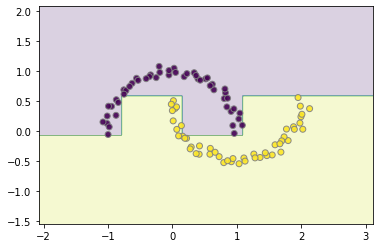

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(random_state=42, noise=.05)
clf = AdaBoostClassifier()
clf.fit(X,y)
plot_boundaries(X, clf)

<a name='x.2.1'></a>

### 7.2.1 Gradient Boosting

[Back to Top](#top)

_Gradient Boosting_ builds on the idea of _AdaBoost_. The term _gradient_ implies that 2 or more derivatives are being taken somewhere. What this is referring to, is while AdaBoost is subject to a predefined loss function, Gradient Boosting can take in any arbitrary (as long as it is differentiable) loss function, to coordinate the training of its weak learners.

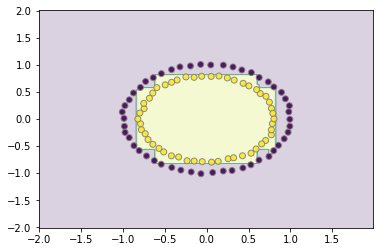

In [11]:
X, y = make_circles(random_state=42, noise=.01)
clf = GradientBoostingClassifier(loss='deviance')
clf.fit(X,y)
plot_boundaries(X, clf)

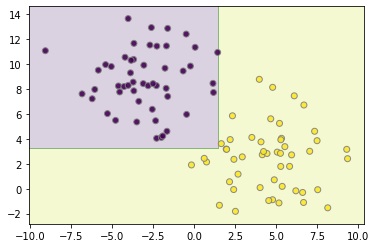

In [12]:
X, y = make_blobs(random_state=42, centers=2, cluster_std=2.5)
clf = GradientBoostingClassifier()
clf.fit(X,y)
plot_boundaries(X, clf)

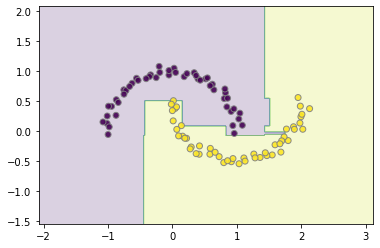

In [13]:
from sklearn.datasets import make_moons
X, y = make_moons(random_state=42, noise=.05)
clf.fit(X,y)
plot_boundaries(X, clf)

# References

[back to top](#top)

* [Generative vs Discriminative Models](https://medium.com/swlh/machine-learning-generative-vs-discriminative-models-9d0fdd156296#:~:text=Commonly%20used%20discriminative%20learning%20algorithms,random%20forest%20and%20gradient%20boosting.&text=The%20most%20commonly%20used%20generative%20algorithm%20is%20the%20naive%20Bayes%20classifier.)